In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, ConstantKernel
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
def f(x):
    return 0.3 * np.exp(0.2*x) + 3 * np.sin(2 * x) - x

In [4]:
#このあとfitに2次元配列で渡す必要がある、最初から2次元にしないとドツボにはまる

x = np.atleast_2d([np.linspace(0, 10, 100)]).T
y = f(x)

In [5]:
import random

sample_num = 10

x_sampled = []

for i in range(sample_num):
    x_sampled.append(random.uniform(0, 10))
    
y_sampled = f(np.array(x_sampled))

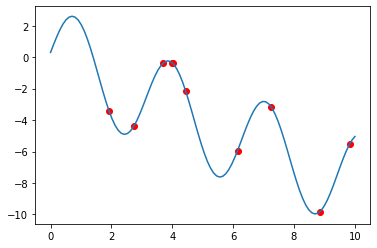

In [6]:
plt.plot(x, y)
plt.scatter(x_sampled, y_sampled, color = 'red')

In [7]:
x_sampled = np.atleast_2d([x_sampled]).T
y_sampled = np.atleast_2d([y_sampled]).T

In [8]:
y_sampled_sc = StandardScaler().fit(y_sampled)

In [9]:
kernel = ConstantKernel() * RBF() + WhiteKernel()

In [10]:
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0)

In [11]:
gpr.fit(x_sampled, y_sampled_sc.transform(y_sampled))

C:\Users\Boo3\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(alpha=0,
                         kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1))

In [12]:
print(gpr.kernel_)

1.03**2 * RBF(length_scale=0.805) + WhiteKernel(noise_level=1e-05)


In [13]:
gpr.score(x_sampled, y_sampled_sc.transform(y_sampled))
#ぴったりすぎて何かおかしい、どこか間違ったか

0.9999999559952795

In [14]:
y_pred, y_sigma = gpr.predict(x, return_std=True)

y_pred = y_sampled_sc.inverse_transform(y_pred)
y_sigma = y_sigma.reshape(-1, 1) * y_sampled_sc.scale_

y_pred[:10]

array([[-3.40482135],
       [-3.35697637],
       [-3.29848451],
       [-3.22871   ],
       [-3.14764638],
       [-3.05615283],
       [-2.95618193],
       [-2.85096669],
       [-2.74512946],
       [-2.64467312]])

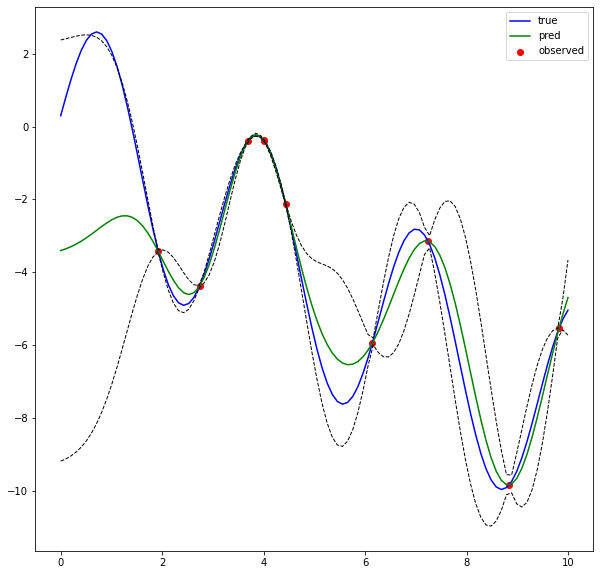

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, color = 'blue', label = 'true')
plt.plot(x, y_pred, color = 'green', label = 'pred')
plt.plot(x, y_pred + 1.96*y_sigma,'k--', lw=1)
plt.plot(x, y_pred - 1.96*y_sigma,'k--', lw=1)
plt.scatter(x_sampled, y_sampled, color = 'red', label = 'observed')
plt.legend()